In [1]:
%matplotlib inline
import sys
sys.path.append("/Users/edwardlrichards/compAcoustics") 

import numpy as np
import pandas as pd
from makeEnv import acousticEnv
from normalMode import Chinook
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
f = 49
sd = 76
c_w = 1500
c_b = 1800
rho_w = 1000
rho_b = 1800
atten = 0.2
d = 100
world = acousticEnv()
world.pekeris(c_w, c_b, rho_w, rho_b, atten, d)

In [3]:
zPlot = np.r_[1:150:100j]
rPlot = np.r_[10:10000:200j]

In [4]:
nm_model = Chinook(f, world)
nm_model.calculateModes_shooting()

In [5]:
p_nm = nm_model.calculatePressure(sd, zPlot, rPlot)
print(nm_model.countNumberModes())

4


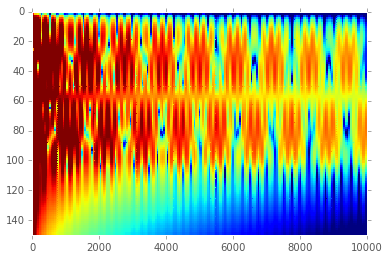

In [6]:
R_nm, Z = np.meshgrid(p_nm.index, p_nm.columns)
TL_nm = 20 * np.log10(np.abs(p_nm.T))
plt.pcolormesh(R_nm, Z, np.array(TL_nm))
plt.clim(-80, -50)
plt.xlim(0, 10000)
plt.ylim(150,0)
plt.show()

In [7]:
vz_nm = nm_model.calculatePressure(sd, zPlot, rPlot, isPressure = False)

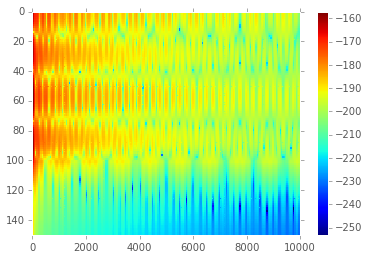

In [8]:
R_nm, Z = np.meshgrid(vz_nm.index, vz_nm.columns)
TL_vel_nm = 20 * np.log10(np.abs(vz_nm.T))
plt.pcolormesh(R_nm, Z, np.array(TL_vel_nm))
# plt.clim(-190, -140)
plt.xlim(0, 10000)
plt.ylim(150,0)
plt.colorbar()
plt.show()

In [9]:
# Simulate a velocity measurement
zMeasure = 94
zMeasure = np.array(p_nm.columns[p_nm.columns > zMeasure][:3])
pSim = np.array(p_nm.ix[:, zMeasure])

diffCoefficents = np.array((-1, 0, 1))
pDiff = np.sum(diffCoefficents[:, None] * np.array(pSim.T), axis = 0)

diffCoefficents = np.array((-3, 4, -1))
pDiff = np.sum(diffCoefficents[:, None] * np.array(pSim.T), axis = 0)

zDiff = np.diff(np.array(zMeasure))[0]
dpdz = np.squeeze(pDiff / (2 * zDiff))

vMeasure = (1 / (1j * 2 * np.pi * f * rho_w)) * dpdz
vExact = vz_nm.ix[:, zMeasure[1]]

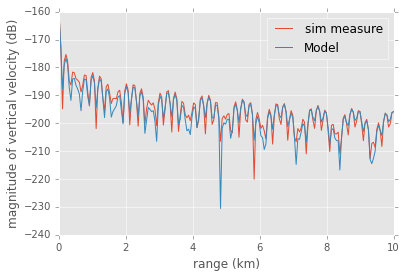

In [10]:
_ = plt.plot(p_nm.index / 1e3,\
    20 * np.log10(np.abs(vMeasure) + np.spacing(1)), label = 'sim measure')
_ = plt.plot(vz_nm.index / 1e3,\
    20 * np.log10(np.abs(vExact) + np.spacing(1)), label = 'Model')
_ = plt.ylabel('magnitude of vertical velocity (dB)')
_ = plt.xlabel('range (km)')
_ = plt.legend()

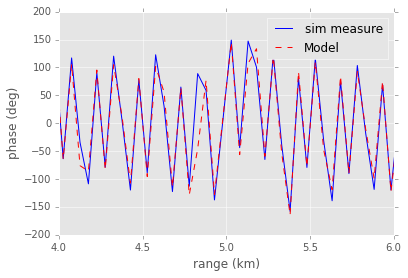

In [11]:
_ = plt.plot(vz_nm.index / 1e3, np.rad2deg(np.angle(vExact)),'b',\
             label = 'sim measure')
_ = plt.plot(p_nm.index / 1e3, np.rad2deg(np.angle(vMeasure)), '--r',\
              label = 'Model')
_ = plt.ylabel('phase (deg)')
_ = plt.xlabel('range (km)')
_ = plt.legend()

_ = plt.xlim(4,6)